# Comparison between the ages for the types (after controlling for gender)

Questions

- What are the differences between the ages for the different types
- Do we observe the same changes as globally?


Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between ages and types (after controlling gender)
SPF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,0), alpha=0.05, test="Wald")
GF_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1/2,0,0,1), alpha=0.05, test="Wald")
SPF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,0,0), alpha=0.05, test="Wald")
GF_104w_8w = results(dge,contrast= c(0,0,0,1,0,1/2,0,0,1,0), alpha=0.05, test="Wald")
SPF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,0,0), alpha=0.05, test="Wald")
GF_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1/2,-1/2,0,1,-1), alpha=0.05, test="Wald")

In [7]:
SPF_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2')
GF_samples = c(
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','GF_104w_M_1_2','GF_104w_M_2_2')
to_comp = c("52w VS 8w (SPF)","52w VS 8w (GF)", "104w VS 52w (SPF)", "104w VS 52w (GF)", "104w VS 8w (SPF)", "104w VS 8w (GF)")

In [8]:
annot = as.data.frame(colData(dge)[, c("age", "gender")])

# Differentially expressed genes

In [9]:
age_type_data = list(SPF_52w_8w, GF_52w_8w, SPF_104w_52w, GF_104w_52w, SPF_104w_8w, GF_104w_8w)
names(age_type_data) = to_comp
age_type_deg = extract_diff_expr_genes(age_type_data, "age-effect/age_type/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) >= 1.5),Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
52w VS 8w (SPF),1391,796,595,603,466,137
52w VS 8w (GF),600,367,233,319,239,80
104w VS 52w (SPF),1474,885,589,426,259,167
104w VS 52w (GF),1623,846,777,813,313,500
104w VS 8w (SPF),3231,1774,1457,1369,901,468
104w VS 8w (GF),1861,972,889,1105,517,588


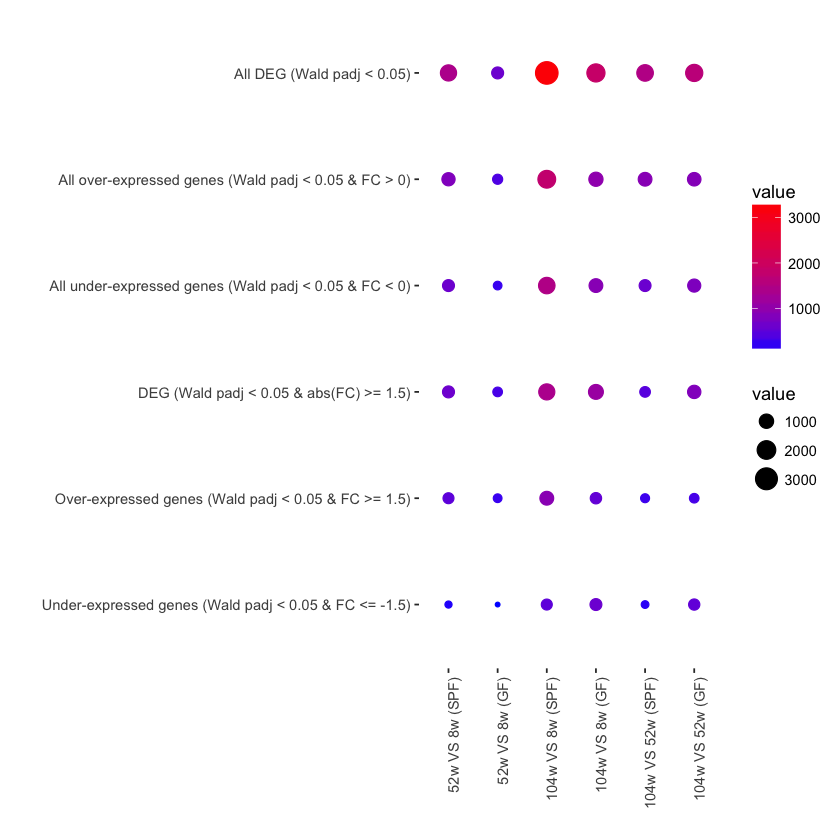

In [10]:
age_type_deg$stat
plot_stat_mat(age_type_deg$stat)

## All DEG (Wald padj < 0.05)

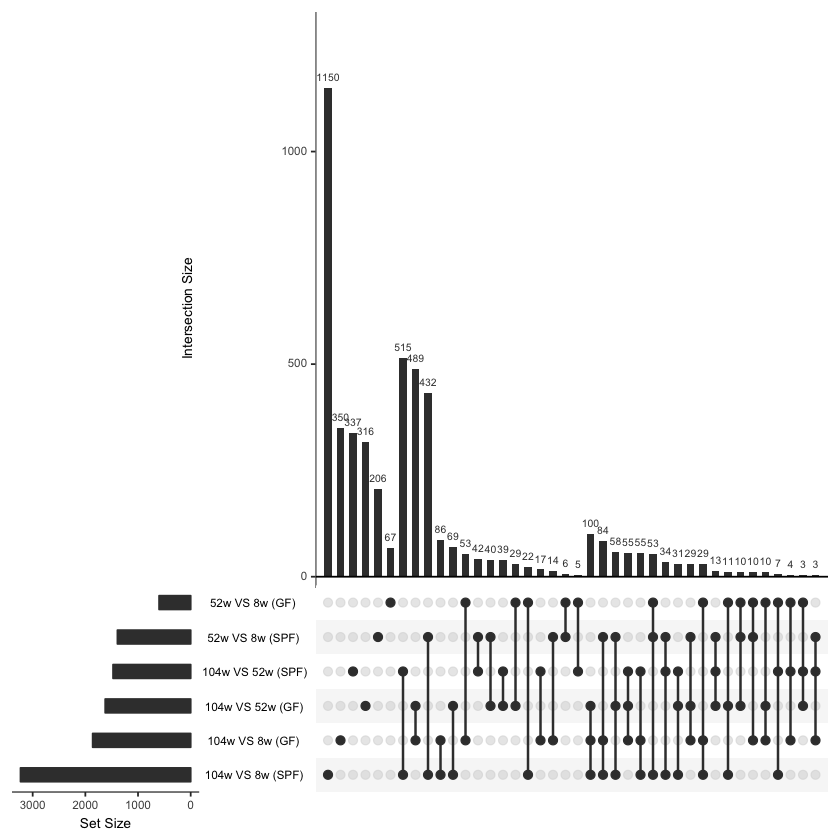

In [11]:
# Differentially expressed genes
upset(as.data.frame(age_type_deg$deg),nsets = 6)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

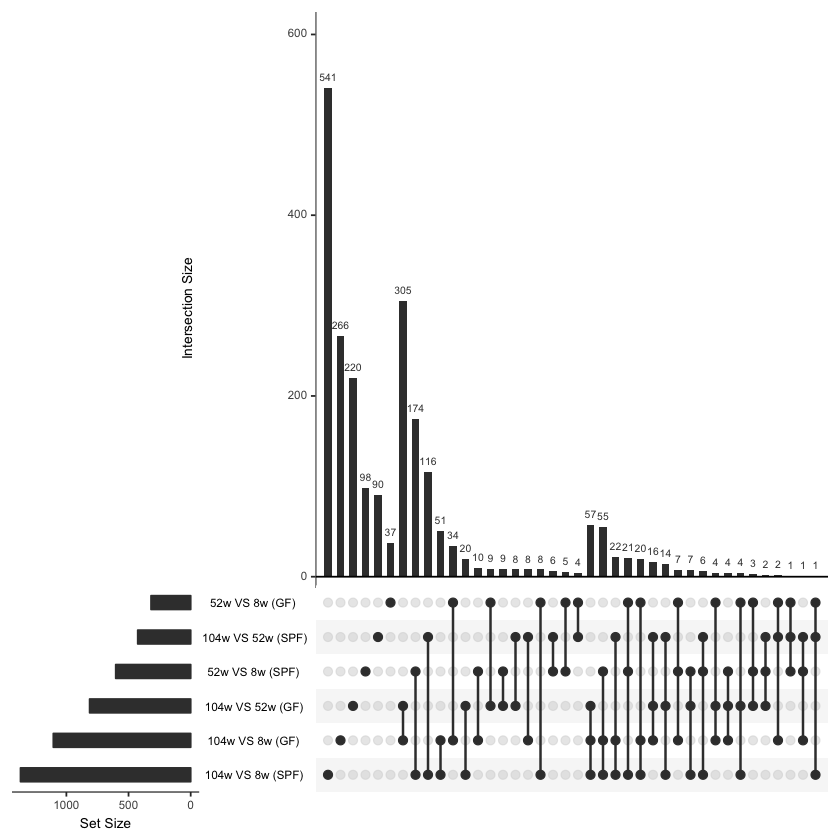

In [12]:
upset(as.data.frame(1*(!is.na(age_type_deg$sign_fc_deg))),nsets = 6)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

,comp,type
52w VS 8w (SPF),52w VS 8w,SPF
52w VS 8w (GF),52w VS 8w,GF
104w VS 52w (SPF),104w VS 52w,SPF
104w VS 52w (GF),104w VS 52w,GF
104w VS 8w (SPF),104w VS 8w,SPF
104w VS 8w (GF),104w VS 8w,GF


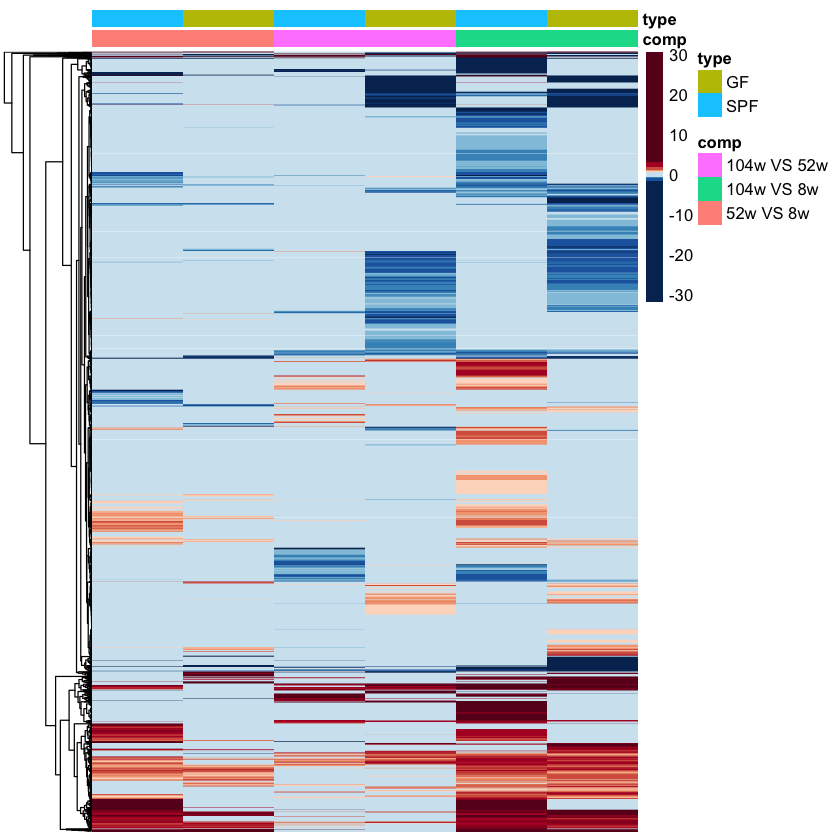

In [13]:
fc_annot = data.frame(comp = c(rep("52w VS 8w",2), rep("104w VS 52w",2), rep("104w VS 8w",2)),
                     type = rep(c("SPF","GF"),3))
rownames(fc_annot) = colnames(age_type_deg$sign_fc_deg)
fc_annot
plot_fc_heatmap(age_type_deg$sign_fc_deg, fc_annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated


 | 52w VS 8w | 104w VS 52w | 104w VS 8w
--- | --- | --- | ---
SPF |  |  | 
GF  |  |  | 

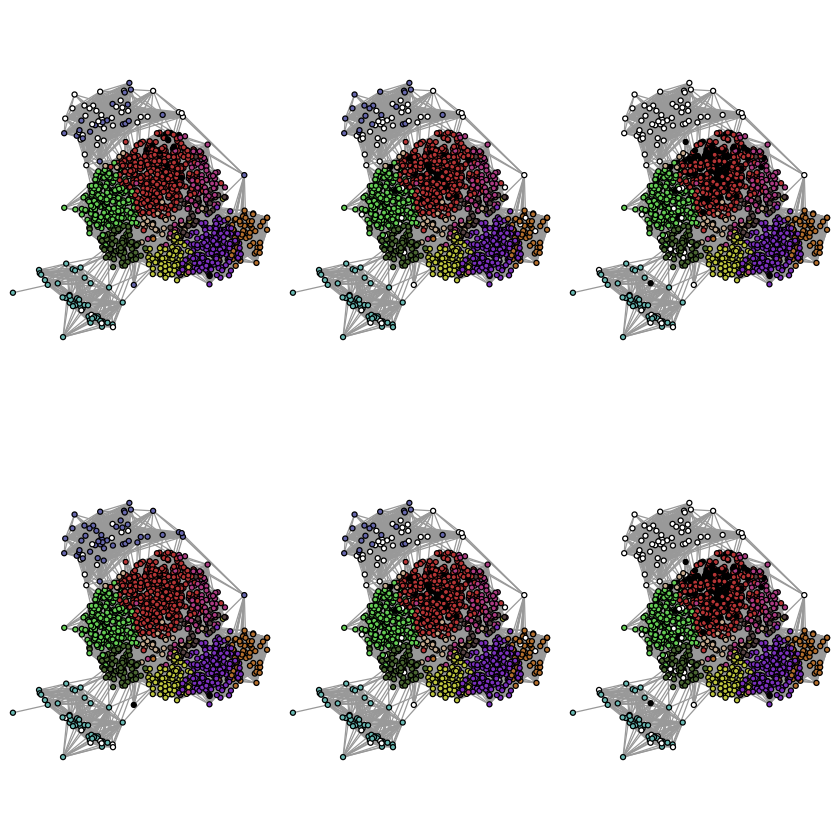

In [14]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
col_52w_vs_8w_SPF = get_deg_colors(age_type_deg, "52w VS 8w (SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_SPF, pal2, layout, add_legend = FALSE)
col_52w_vs_8w_GF = get_deg_colors(age_type_deg, "104w VS 52w (SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_GF, pal2, layout, add_legend = FALSE)
col_104w_vs_52w_SPF = get_deg_colors(age_type_deg, "104w VS 8w (SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_SPF, pal2, layout, add_legend = FALSE)
col_104w_vs_52w_GF = get_deg_colors(age_type_deg, "52w VS 8w (GF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_GF, pal2, layout, add_legend = FALSE)
col_104w_vs_8w_SPF = get_deg_colors(age_type_deg, "104w VS 52w (SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_8w_SPF, pal2, layout, add_legend = FALSE)
col_104w_vs_8w_GF = get_deg_colors(age_type_deg, "104w VS 8w (SPF)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_8w_GF, pal2, layout, add_legend = FALSE)

# GO analysis

In [15]:
full_go_desc = age_type_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_type_deg$GO_wall[[1]][,"category"]
comp = colnames(age_type_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


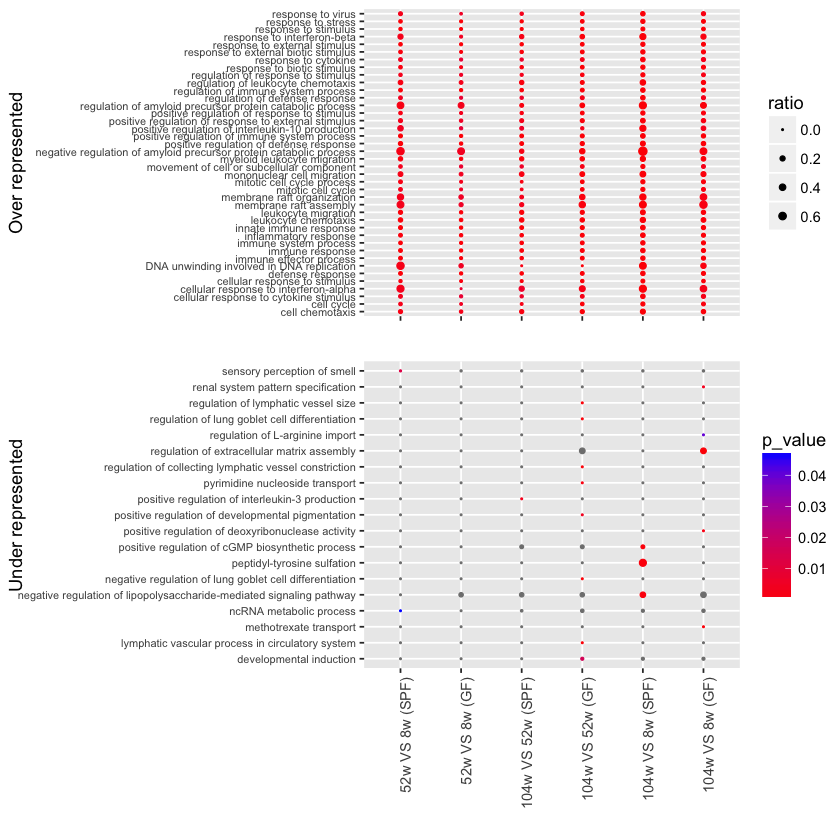

In [16]:
plot_top_go(age_type_deg,
            "BP",
            40)

Network based on description similarity

In [17]:
BP_network = create_GO_network(age_type_deg, "BP", BP_GO)

 | 52w VS 8w | 104w VS 52w | 104w VS 8w
--- | --- | --- | ---
SPF |  |  | 
GF  |  |  | 

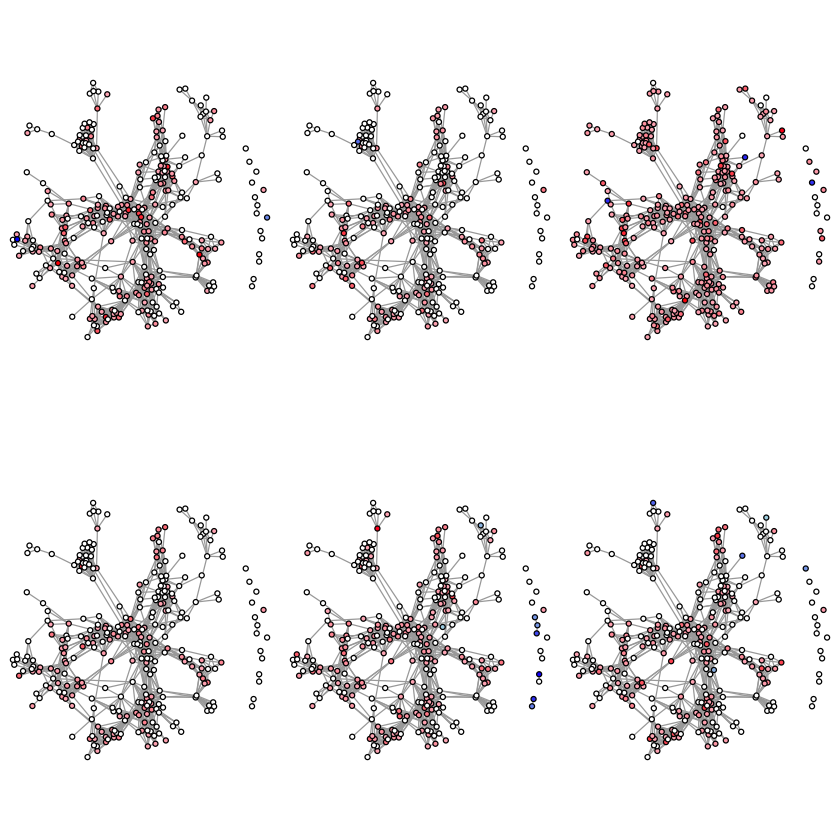

In [18]:
par(mfrow=c(2,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w (SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (SPF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (GF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (GF)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (GF)", full_go_desc, plot_interactive = FALSE)

### 52w VS 8w (SPF)

In [19]:
col = get_GO_network_col(BP_network, "52w VS 8w (SPF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/52w_VS_8w_SPF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type/go/52w_VS_8w_SPF.png)

GO Tree at "../results/dge/age-effect/age_type/go/52w_VS_8w_SPF.png"

### 52w VS 8w (GF)

In [20]:
col = get_GO_network_col(BP_network, "52w VS 8w (GF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/52w_VS_8w_GF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type/go/104w_VS_52w_GF.png)

GO Tree at "../results/dge/age-effect/age_type/go/52w_VS_8w_GF.png"

### 104w VS 52w (SPF)

In [21]:
col = get_GO_network_col(BP_network, "104w VS 52w (SPF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/104w_VS_52w_SPF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type/go/104w_VS_52w_SPF.png)

GO Tree at "../results/dge/age-effect/age_type/go/104w_VS_52w_SPF.png"

### 104w VS 52w (GF)

In [22]:
col = get_GO_network_col(BP_network, "104w VS 52w (GF)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_type/go/104w_VS_52w_GF",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_type_genes/go/104w_VS_52w_GF.png)

GO Tree at "../results/dge/age-effect/age_type/go/104w_VS_52w_GF.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


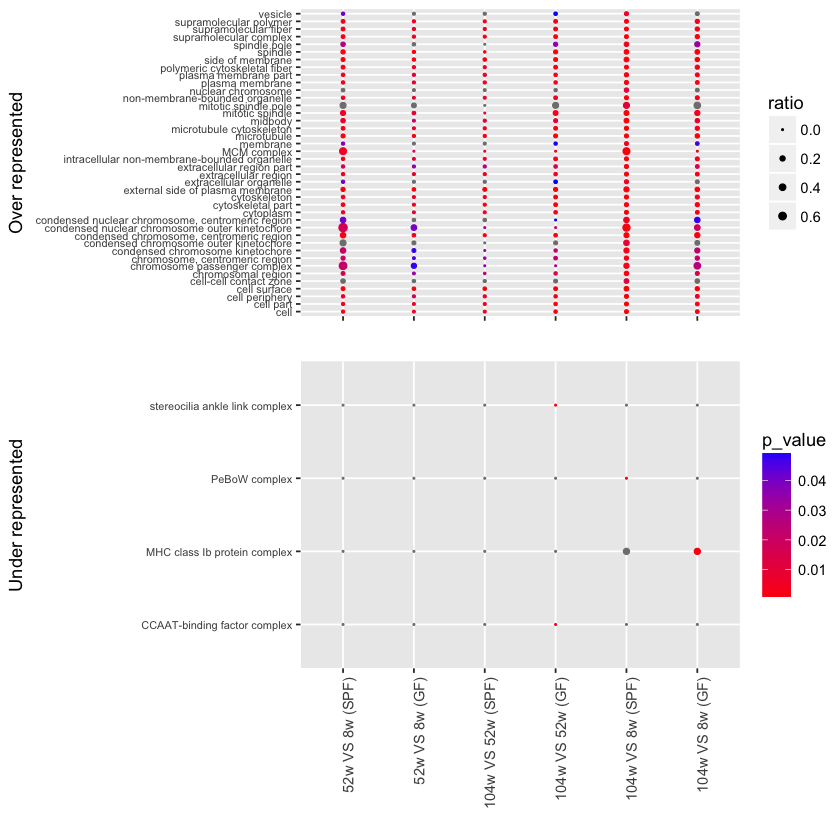

In [23]:
plot_top_go(age_type_deg,
            "CC",
            40)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


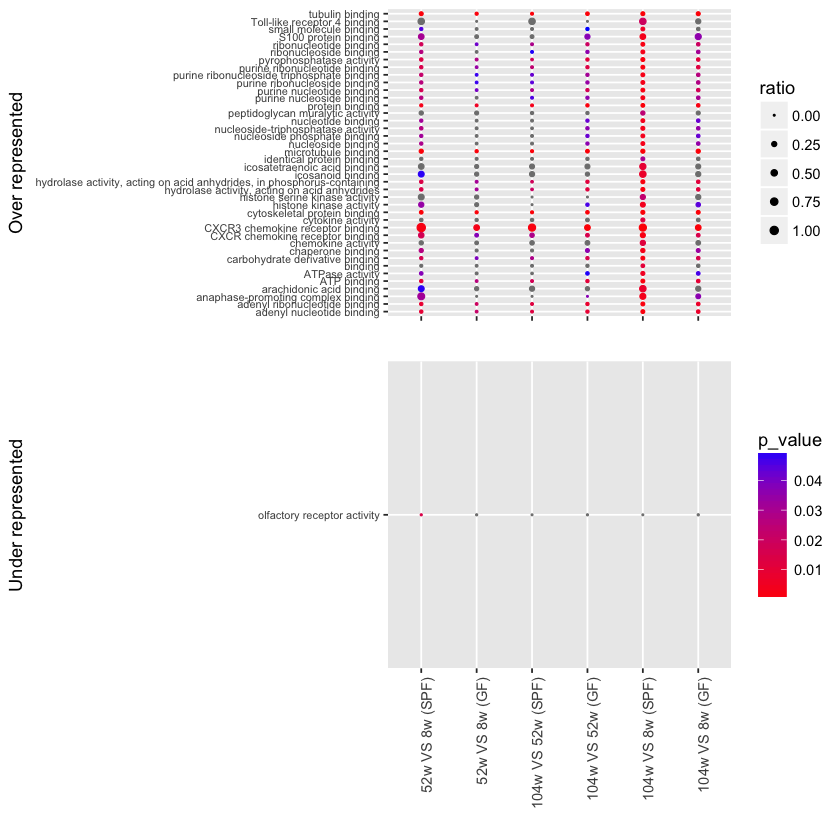

In [24]:
plot_top_go(age_type_deg,
            "MF",
            40)

# KEGG pathways

In [25]:
plot_kegg_pathways(age_type_deg$over_represented_KEGG[,"category"],
                   age_type_deg$fc_deg,
                   "../results/dge/age-effect/age_type/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 77 rows, data has 92


In [ ]:
plot_kegg_pathways(age_type_deg$under_represented_KEGG[,"category"],
                   age_type_deg$fc_deg,
                   "../results/dge/age-effect/age_type/kegg/under_repr_kegg/")

# SPF effect in aging

Question: Is there any genes that shows an increasing fold change in SPF with aging while not for GF?

| 52w vs 8w for SPF | 52w vs 8w for GF | 104w vs 52w for SPF | 104w vs 52w for GF | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != |  | != |  | 244
Set 2 | != | == | != | == | 92 


In [26]:
# set extractions
set1 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,"52w VS 8w (SPF)"]) & !is.na(age_type_deg$fc_deg[,"104w VS 52w (SPF)"]),])
set2 = rownames(age_type_deg$fc_deg[!is.na(age_type_deg$fc_deg[,"52w VS 8w (SPF)"]) & is.na(age_type_deg$fc_deg[,"52w VS 8w (GF)"]) & !is.na(age_type_deg$fc_deg[,"104w VS 52w (SPF)"]) & is.na(age_type_deg$fc_deg[,"104w VS 52w (GF)"]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_type_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_type_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0

,Gene number
Set 1,244
Set 2,92


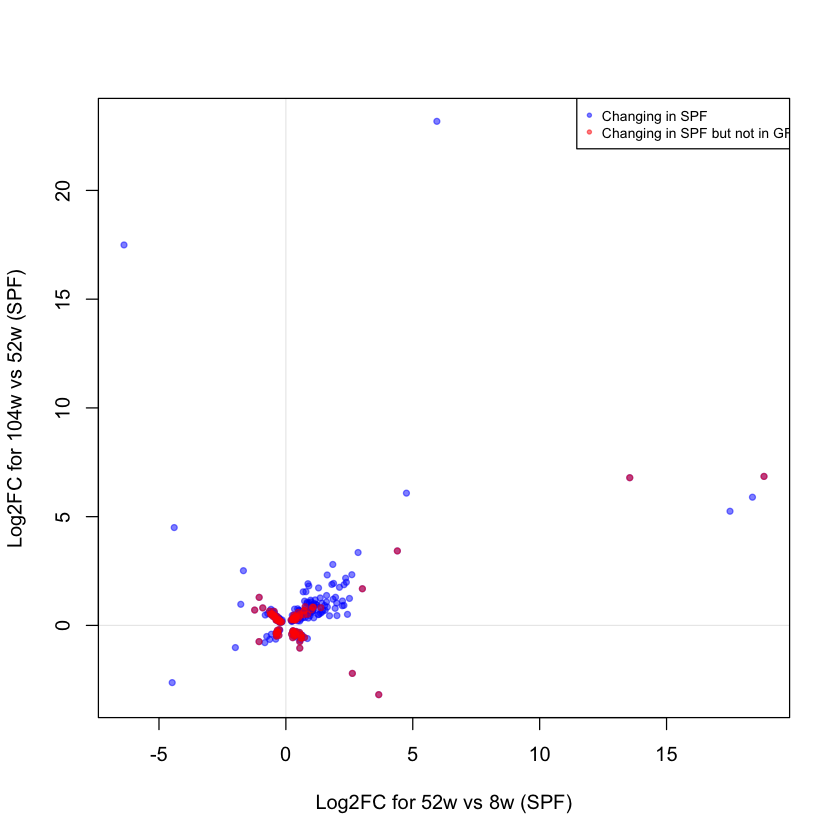

In [27]:
# plots of the differences
plot(set1_fc[,"52w VS 8w (SPF)"], set1_fc[,"104w VS 52w (SPF)"], xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)", pch = 20, col = rgb(0,0,1,alpha=0.5))
points(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"], pch = 20, col = rgb(1,0,0,alpha=0.5))
legend("topright", pch = 20, col = c(rgb(0,0,1,alpha=0.5),rgb(1,0,0,alpha=0.5)), legend=c("Changing in SPF", "Changing in SPF but not in GF"), cex = 0.7)
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))

## Genes with differential expression with aging in SPF but not in GF (set2)

In [28]:
aging_SPF_diff = cbind(set2_fc[,"52w VS 8w (SPF)"], set2_fc[,"104w VS 52w (SPF)"])
colnames(aging_SPF_diff) = c("52w VS 8w (SPF)","104w VS 52w (SPF)")

### 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0

[1] 33

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 23.489, df = 31, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9456141 0.9867280
sample estimates:
      cor 
0.9730381 



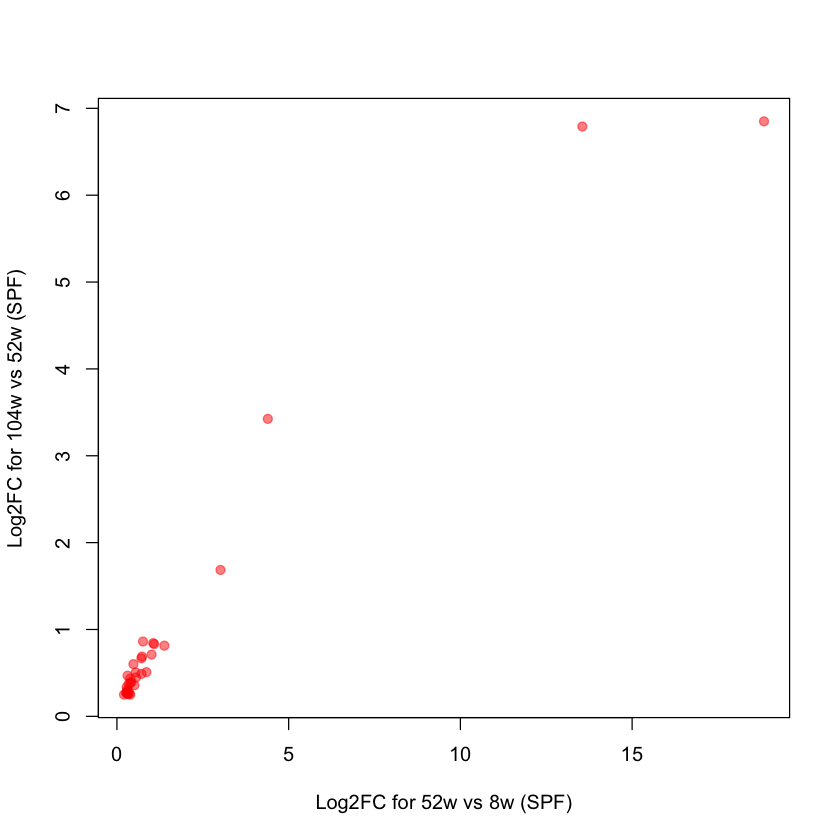

In [29]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
pos_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(pos_1_pos_2)
plot(pos_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

### 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0

[1] 23

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -19.401, df = 21, p-value = 6.881e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9887658 -0.9368473
sample estimates:
       cor 
-0.9732205 



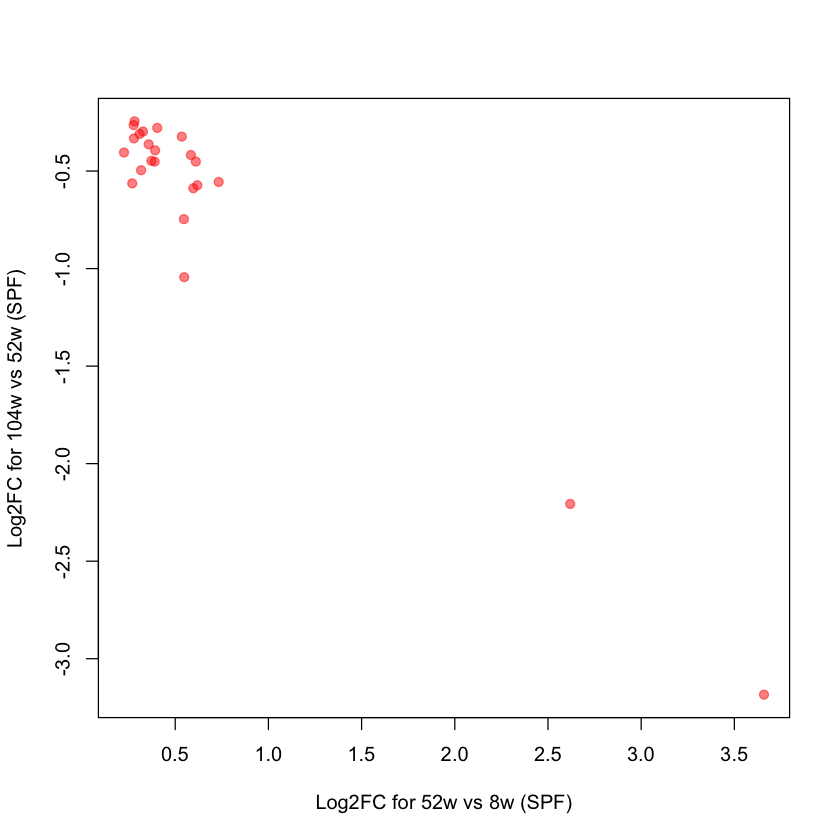

In [30]:
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
pos_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]>0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(pos_1_neg_2)
plot(pos_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

### 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0

[1] 24

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -8.1923, df = 22, p-value = 3.971e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9415922 -0.7145938
sample estimates:
       cor 
-0.8678267 



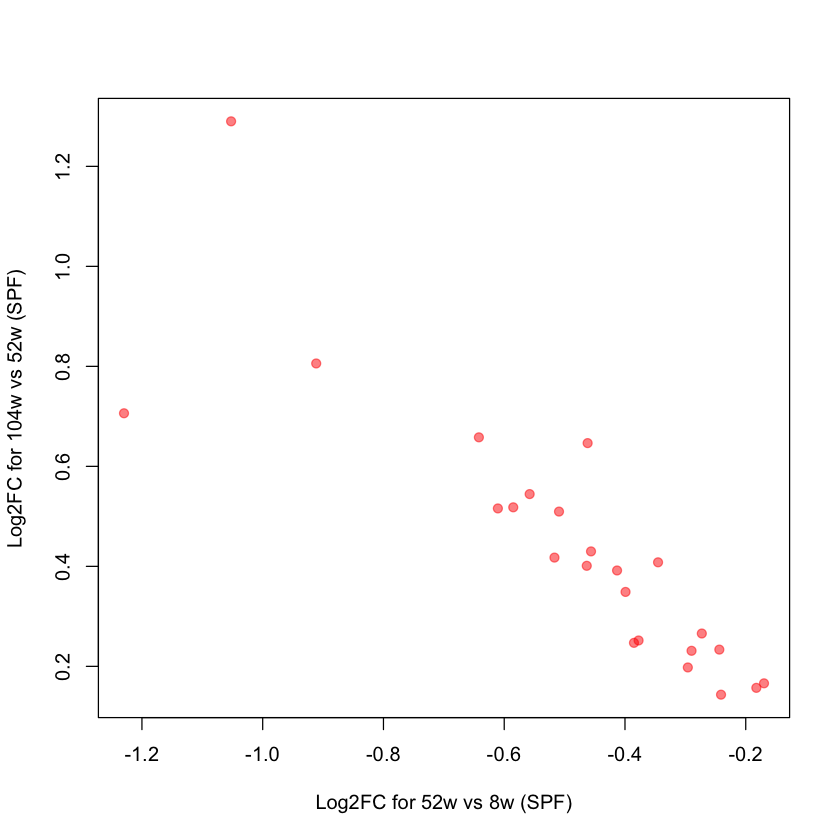

In [31]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
neg_1_pos_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]>0,]
investigate_gene_set(neg_1_pos_2)
plot(neg_1_pos_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

### 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0

[1] 12

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 4.3999, df = 10, p-value = 0.001335
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4459551 0.9453668
sample estimates:
      cor 
0.8120303 



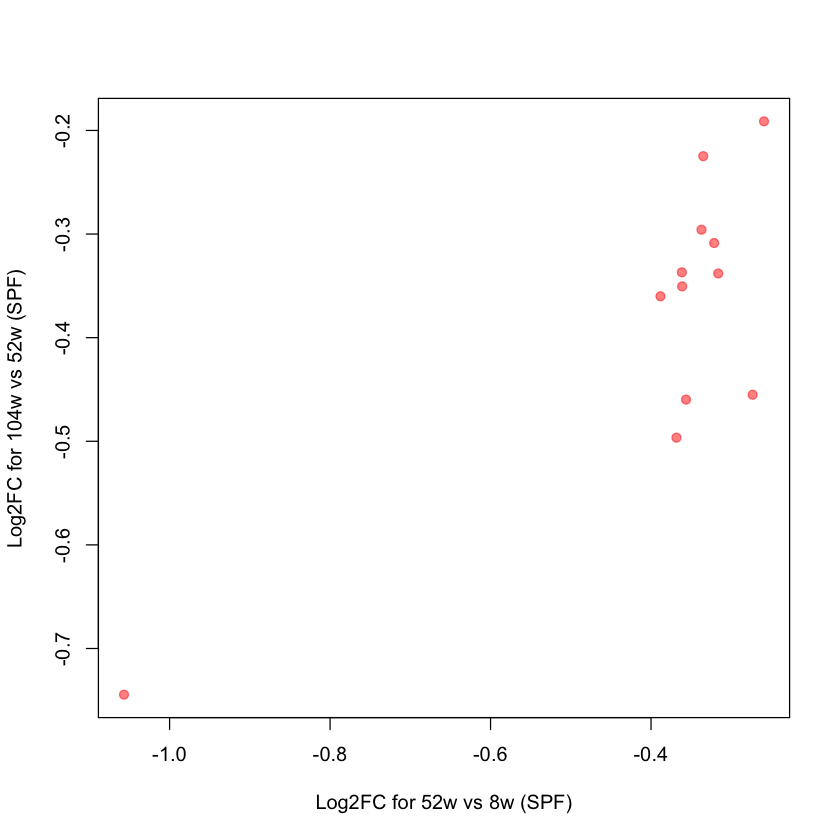

In [32]:
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
neg_1_neg_2 = aging_SPF_diff[aging_SPF_diff[,"52w VS 8w (SPF)"]<0 & aging_SPF_diff[,"104w VS 52w (SPF)"]<0,]
investigate_gene_set(neg_1_neg_2)
plot(neg_1_neg_2, col = rgb(1,0,0,alpha=0.5), pch = 19, xlab = "Log2FC for 52w vs 8w (SPF)", ylab= "Log2FC for 104w vs 52w (SPF)")

## Summary

![](../results/dge/age-effect/age_type/SPF_aging_genes.png)

[1] 4

[1] 5

[1] 4

[1] 1

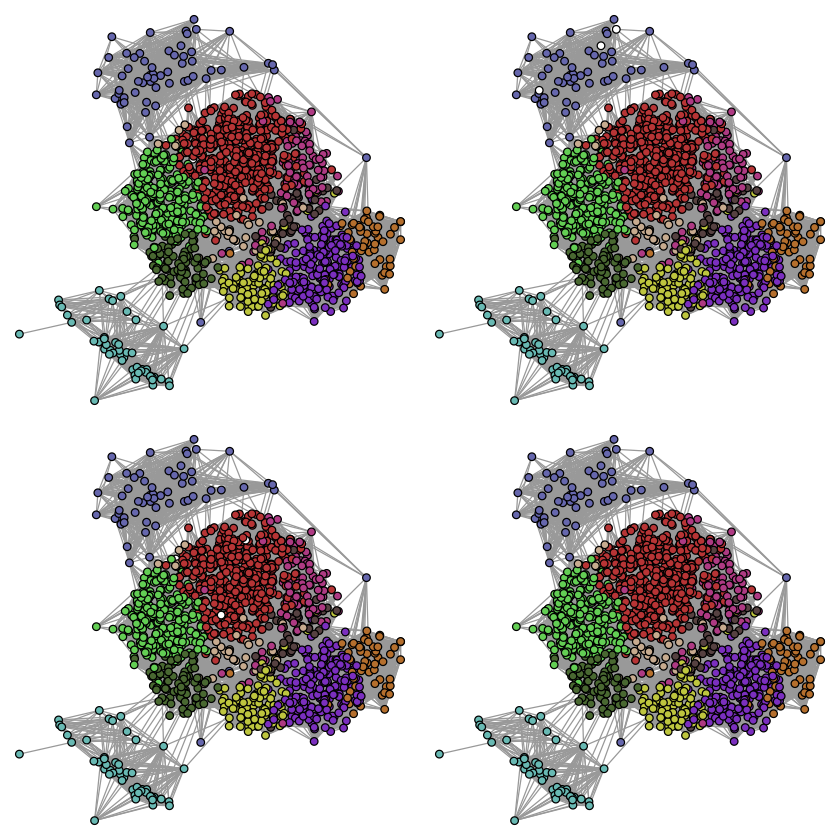

In [33]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) > 0
neg_1_pos_2_col = connected_gene_colors
sum(names(neg_1_pos_2_col) %in% rownames(neg_1_pos_2))
neg_1_pos_2_col[which(names(neg_1_pos_2_col) %in% rownames(neg_1_pos_2))] = module_nb + 1
plot_net_with_layout(net, neg_1_pos_2_col, pal2, layout, add_legend = F)
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) > 0
pos_1_pos_2_col = connected_gene_colors
sum(names(pos_1_pos_2_col) %in% rownames(pos_1_pos_2))
pos_1_pos_2_col[which(names(pos_1_pos_2_col) %in% rownames(pos_1_pos_2))] = module_nb + 1
plot_net_with_layout(net, pos_1_pos_2_col, pal2, layout, add_legend = F)
# 52w VS 8w (SPF) < 0 and 104w VS 52w (SPF) < 0
neg_1_neg_2_col = connected_gene_colors
sum(names(neg_1_neg_2_col) %in% rownames(neg_1_neg_2))
neg_1_neg_2_col[which(names(neg_1_neg_2_col) %in% rownames(neg_1_neg_2))] = module_nb + 1
plot_net_with_layout(net, neg_1_neg_2_col, pal2, layout, add_legend = F)
# 52w VS 8w (SPF) > 0 and 104w VS 52w (SPF) < 0
pos_1_neg_2_col = connected_gene_colors
sum(names(pos_1_neg_2_col) %in% rownames(pos_1_neg_2))
pos_1_neg_2_col[which(names(pos_1_neg_2_col) %in% rownames(pos_1_neg_2))] = module_nb + 1
plot_net_with_layout(net, pos_1_neg_2_col, pal2, layout, add_legend = F)